# Descripción del proyecto
Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

## Descripción técnica
- Nombre de la prueba: recommender_system_test
- Grupos: А (control), B (nuevo embudo de pago)
- Fecha de lanzamiento: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase). - En cada etapa del embudo product_page → product_cart → purchase, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

## Descripción de los datos
Estructura de los CSV:
- **ab_project_marketing_events_us.csv** — el calendario de eventos de marketing para 2020
- **final_ab_new_users_upd_us.csv** — todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020
- **final_ab_events_upd_us.csv** — todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
- **final_ab_participants_upd_us.csv** — tabla con los datos de los participantes de la prueba

Estructura **ab_project__marketing_events_us.csv:**
- name — el nombre del evento de marketing
- regions — regiones donde se llevará a cabo la campaña publicitaria
- start_dt — fecha de inicio de la campaña
- finish_dt — fecha de finalización de la campaña

Estructura **final_ab_new_users_upd_us.csv:**
- user_id
- first_date — fecha de inscripción
- region
- device — dispositivo utilizado para la inscripción

Estructura **final_ab_events_upd_us.csv:**
- user_id
- event_dt — fecha y hora del evento
- event_name — nombre del tipo de evento
- details — datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)

Estructura **final_ab_participants_upd_us.csv:**
- user_id
- ab_test — nombre de la prueba
- group — el grupo de prueba al que pertenecía el usuario


# Objetivo del estudio
Analizar y compruebar si se ha realizado correctamente el estudio de **factibilidad de una granja de sandías en Brasil**; aplicar las pruebas necesarias y analizar los resultados.


# Análisis Explatorio

## Análisis Inicial

In [4]:
#Importado de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [5]:
#Carga de los archivos CSV
mkt_events = pd.read_csv('datasets/ab_project_marketing_events_us.csv')
events = pd.read_csv('datasets/final_ab_events_upd_us.csv')
new_users = pd.read_csv('datasets/final_ab_new_users_upd_us.csv')
participants = pd.read_csv('datasets/final_ab_participants_upd_us.csv')

In [6]:
#Exploración de los datos del DF mkt_events
mkt_events.info()
mkt_events.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
4,4th of July Promo,N.America,2020-07-04,2020-07-11
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10


In [7]:
#Exploración de los datos del df events
events.info()
events.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
162133,DED1E0C437CB9BD2,2020-12-15 11:17:25,product_page,NaN
35910,DE92BF81B0D947E8,2020-12-20 03:58:47,purchase,9.99
81355,C9A484DEDC5278A3,2020-12-15 06:49:00,product_cart,NaN
279143,1A424A06BCAE2BD4,2020-12-13 01:40:56,login,NaN
241859,853EECE16E08BA6F,2020-12-07 12:09:26,login,NaN


In [8]:
#Exploración de los datos del DF new_users
new_users.info()
new_users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


,user_id,first_date,region,device
51957,77D205D1A7FD47EF,2020-12-13,N.America,PC
20148,EDA00DACE98495FB,2020-12-15,EU,iPhone
25433,F915D113F120E610,2020-12-22,N.America,Android
31611,EA3B3F3317FF261F,2020-12-23,CIS,Mac
43149,9EC475B8A841FA12,2020-12-18,N.America,iPhone


In [9]:
#Exploración de los datos del DF participants
participants.info()
participants.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
9905,F764800760E07DCA,A,interface_eu_test
9547,E864D14919D863AD,B,interface_eu_test
3095,AC4F0C6F72419245,A,recommender_system_test
8878,687686C65F725F2A,A,interface_eu_test
6055,D6A4D8A1D9A2E083,B,interface_eu_test


## Identificación de datos nulos y repetidos

In [10]:
#Contamos los celdas repetidas y nulas en cada columna de mkt_events
print('MKT Events')
print('Celdas repetidas:\n', mkt_events.duplicated().sum())
print('Celdas nulas:\n',mkt_events.isnull().sum())

#Contamos los celdas repetidas y nulas en cada columna de events
print('\nEvents')
print('Celdas repetidas:\n', events.duplicated().sum())
print('Celdas nulas:\n',events.isnull().sum())

#Contamos los celdas repetidas y nulas en cada columna de new_users
print('\nNew Users')
print('Celdas repetidas:\n', new_users.duplicated().sum())
print('Celdas nulas:\n',new_users.isnull().sum())

#Contamos los celdas repetidas y nulas en cada columna de participants
print('\nParticipants')
print('Celdas repetidas:\n', participants.duplicated().sum())
print('Celdas nulas:\n',participants.isnull().sum())

MKT Events
Celdas repetidas:
 0
Celdas nulas:
 name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

Events
Celdas repetidas:
 0
Celdas nulas:
 user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

New Users
Celdas repetidas:
 0
Celdas nulas:
 user_id       0
first_date    0
region        0
device        0
dtype: int64

Participants
Celdas repetidas:
 0
Celdas nulas:
 user_id    0
group      0
ab_test    0
dtype: int64


## Transformación de los datos

In [11]:
#Convertimos a float la columnna 'details' del df events
#Antes de la conversión, reemplazamos los valores NaN por 0
events['details'] = events['details'].fillna(0)
events['details'] = events['details'].astype(float)

#Generamos una función para convertir las columnas de object a datetime
#Recibe un DataFrame, una lista de columnas y el formato de fecha
def convert_to_datetime(df, columns, format):
    for column in columns:
        df[column] = pd.to_datetime(df[column], format=format)
    print(f"Converted columns {columns} to datetime with format '{format}' in DataFrame.")
    return df


#Convertimos a datetime (año/mes/día) la columna 'first_date' del df new_users; 'start_dt' y 'finish_dt' del df mkt_events 
convert_to_datetime(new_users, ['first_date'], '%Y-%m-%d')
convert_to_datetime(mkt_events, ['start_dt', 'finish_dt'], '%Y-%m-%d')

#Convertimos a datetime (año/mes/día h:m:s) la columna 'event_dt' del df events
convert_to_datetime(events, ['event_dt'], '%Y-%m-%d %H:%M:%S')


Converted columns ['first_date'] to datetime with format '%Y-%m-%d' in DataFrame.
Converted columns ['start_dt', 'finish_dt'] to datetime with format '%Y-%m-%d' in DataFrame.
Converted columns ['event_dt'] to datetime with format '%Y-%m-%d %H:%M:%S' in DataFrame.


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00


    - Dentro de los Data Frames no fueron encontrados datos repetidos ni nulos al momento de realizar una busqueda superficial; tampoco se encontraron inconsistencias en los nombres de las series. Por lo que solo se realizarán modificaciones de "tipo", para la serie DETAILS del DF EVENTS es de tipo object pero su origen es monetario por lo que se reemplazarán los nulos por ceros y el tipo será FLOAT. Después todas las series de naturaleza de fecha serán modficadas de OBJECT a tipo DATETIME, siendo que la serie FIRST_DATE del DF NEW_USERS y las series START_DT y FINISH_DT del DF MKT_EVENTS tendrán un formato '%Y-%m-%d'; y la ultima modificación de DATETIME es para la serie EVENT_DT del DF EVENTS tentrá un formato ligeramente distinto al agregarle la hora, minuto y segundo '%Y-%m-%d %H:%M:%S'.

# Estudio del embudo

## Etapas del embudo

In [12]:
#Validamos que los grupos A y B no tengan usuarios repetidos
duplicated_users = participants.duplicated(subset='user_id', keep=False)
print(f'\nUsuarios en más de un grupo: {duplicated_users.sum()}')

#Buscamos los usuarios del DF participants que NO estan en el DF new_users
missing_users = participants[~participants['user_id'].isin(new_users['user_id'])]
print(f'\nUsuarios participantes de la prueba que NO están en la lista de usuarios nuevos registrados: {len(missing_users)}')

#Contamos los usuarios participantes que no cuenten con ningún evento registrado
no_events_users = participants[~participants['user_id'].isin(events['user_id'])]
print(f'\nUsuarios participantes que no tienen eventos registrados: {len(no_events_users)}')


Usuarios en más de un grupo: 1774

Usuarios participantes de la prueba que NO están en la lista de usuarios nuevos registrados: 0

Usuarios participantes que no tienen eventos registrados: 0


    - Se identificaron 1,774 usuarios asignados a más de un grupo, lo cual es una violación crítica del diseño experimental, ya que puede contaminar los resultados y sesgar las métricas de conversión. Afortunadamente, no se detectaron participantes fuera del rango de usuarios nuevos ni usuarios sin eventos registrados, lo que garantiza consistencia entre las tablas de participantes, nuevos usuarios y eventos. Sin embargo, para futuras pruebas es fundamental aplicar controles estrictos de asignación única por usuario para preservar la validez estadística del experimento.

In [13]:
#Antes de analizar las etapas del embudo es necesario encontrar y dividir los usuarios en grupos
#Contamos los usuarios por grupo
users_by_group = participants['group'].value_counts()
print('\nUsuarios por grupo:')
print(users_by_group)


Usuarios por grupo:
group
A    8214
B    6311
Name: count, dtype: int64


In [14]:
#Unificamos los DataFrames de events y participants, para luego unificarlos con new_users para obtener un DataFrame completo
#que contenga todos los usuarios, sus eventos y su grupo de participación
events_participants = events.merge(participants, on='user_id').merge(new_users[['user_id', 'first_date']], on='user_id')

#Filtramos los eventos que fueron realizados solo durante los primeros 14 días desde el registro del usuario
#De esta forma, nos aseguramos de que los eventos sean relevantes para el análisis del embudo
events_participants = events_participants[events_participants['event_dt'] <= events_participants['first_date'] + pd.Timedelta(days=14)]
#Asi como filtramos los eventos que son de relevacia para el análisis del embudo por lo que omitimos los eventos de tipo 'login'
events_participants = events_participants[events_participants['event_name'] != 'login']

print(events_participants.info())
print(events_participants.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 55816 entries, 0 to 58127
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     55816 non-null  object        
 1   event_dt    55816 non-null  datetime64[ns]
 2   event_name  55816 non-null  object        
 3   details     55816 non-null  float64       
 4   group       55816 non-null  object        
 5   ab_test     55816 non-null  object        
 6   first_date  55816 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 3.4+ MB
None
                user_id            event_dt    event_name  details group  \
39398  19E774EAFD97AA92 2020-12-16 21:31:30  product_page     0.00     A   
35288  834A2F48EF56608B 2020-12-13 19:33:58  product_page     0.00     B   
37632  39393B197D7743EB 2020-12-15 02:30:11  product_page     0.00     A   
7757   57E796E81DD60883 2020-12-19 03:05:17      purchase     9.99     B   
4939   7B

    - La prueba contó con una asignación desigual de usuarios entre grupos: 8,214 en el grupo A y 6,311 en el grupo B. Aunque este desbalance podría parecer problemático a primera vista, no es necesario emparejar las muestras, ya que la prueba estadística utilizada (Z para proporciones) ajusta automáticamente las diferencias en el tamaño de muestra al calcular la significancia. Forzar un emparejamiento por submuestreo reduciría la potencia estadística del análisis sin aportar beneficios reales.

,purchase_sum,purchase_count,product_cart_sum,product_cart_count,product_page_sum,product_page_count,conv_product_page,conv_product_cart,conv_purchase
group,,,,,,,,,
A,2613,6491,2419,6491,5080,6491,0.782622,0.372670,0.402557
B,1950,5005,1975,5005,3841,5005,0.767433,0.394605,0.389610


<Figure size 1200x600 with 0 Axes>

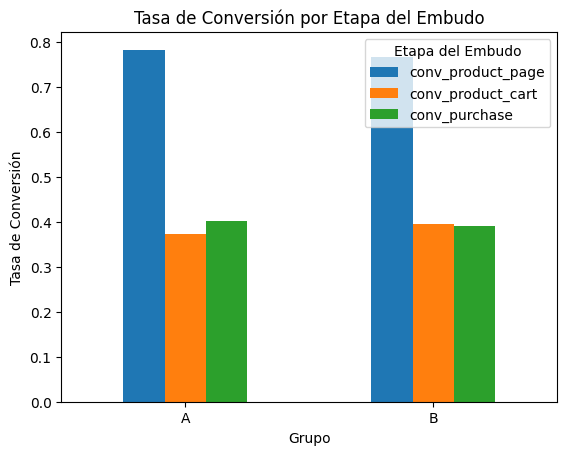

In [15]:
#Filtramos por el primer evento de cada usuario
first_events = events_participants.sort_values('event_dt').drop_duplicates(subset=['user_id', 'event_name'])

#Creamos una pivot table para organizar los eventos por usuario y grupo
funnel= first_events.pivot_table(index=['user_id', 'group'], columns='event_name', values='event_dt', aggfunc='first')

#Reemplazamos fechas con 1 y NaNs con 0 para saber si ocurrió el evento
funnel_bin = funnel.notna().astype(int).reset_index()

#Calculamos la tasa de conversión para cada etapa del embudo
#Creamos una lista con los nombres de las etapas del embudo
funnel_stages = events_participants['event_name'].unique().tolist()
final_funnel = funnel_bin.groupby('group')[funnel_stages].agg(['sum', 'count'])

#Renombramos las columnas para que sean más descriptivas
final_funnel.columns =  ['_'.join(col) for col in final_funnel.columns]
final_funnel['conv_product_page'] = final_funnel['product_page_sum'] / final_funnel['product_page_count']
final_funnel['conv_product_cart'] = final_funnel['product_cart_sum'] / final_funnel['product_cart_count']
final_funnel['conv_purchase'] = final_funnel['purchase_sum'] / final_funnel['purchase_count']

display(final_funnel)

#Generamos una gráfica de barras para comparar el grupo A y B por cada etapa del embudo
plt.figure(figsize=(12, 6))
final_funnel[[col for col in final_funnel.columns if 'conv_' in col]].plot(kind='bar', rot=0)
plt.title('Tasa de Conversión por Etapa del Embudo')
plt.xlabel('Grupo')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=0)
plt.legend(title='Etapa del Embudo')
plt.show()

    - El grupo B mostró una ligera mejora en la conversión hacia el carrito (product_cart: 39.5 % vs. 37.3 %) respecto al grupo A, lo que sugiere un efecto positivo del sistema de recomendaciones en la intención de compra. Sin embargo, el grupo A mantuvo una conversión marginalmente superior tanto en visitas a producto (product_page) como en compras finales (purchase: 40.3 % vs. 38.9 %). Estos resultados indican que, aunque el nuevo sistema puede incentivar más interacciones intermedias, aún no se traduce en un impacto positivo claro en la conversión final.

## Numero de eventos por usuarios


Promedio de eventos por usuario:
 group
A    4.850642
B    4.629146
Name: event_count, dtype: float64


/tmp/ipykernel_32134/2836708698.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=event_counts, x='group', y='event_count', palette={'A': 'yellow', 'B': 'purple'})


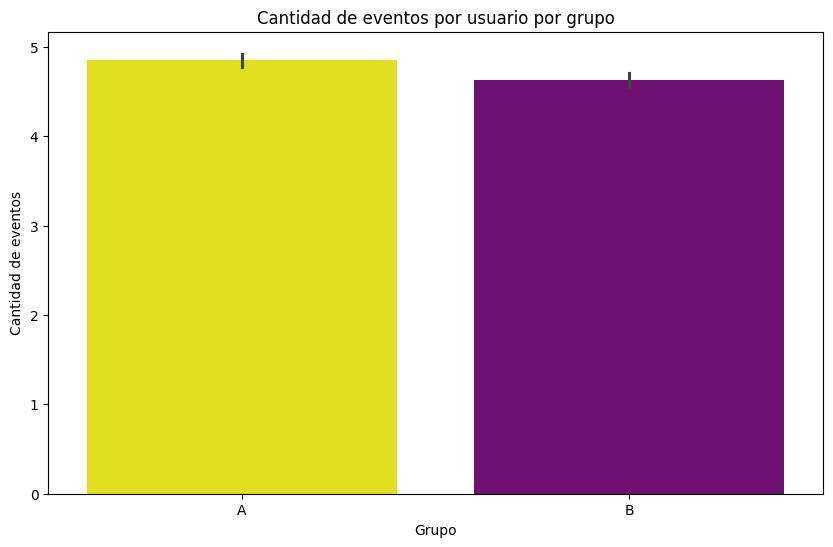

In [16]:
#Calculamos la cantidad de eventos por usuario
event_counts = events_participants.groupby(['user_id', 'group']).size().reset_index(name='event_count')
print('\nPromedio de eventos por usuario:\n', event_counts.groupby('group')['event_count'].mean())

#Creamos un gráfico de barras para visualizar la cantidad de eventos por usuario
plt.figure(figsize=(10, 6))
sns.barplot(data=event_counts, x='group', y='event_count', palette={'A': 'yellow', 'B': 'purple'})
plt.title('Cantidad de eventos por usuario por grupo')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de eventos')
plt.show()


    - El grupo A presentó un promedio ligeramente superior de eventos por usuario (4.85) en comparación con el grupo B (4.63). Aunque la diferencia no es abismal, podría indicar una mayor interacción general del grupo de control con la plataforma. Esto refuerza la necesidad de profundizar en la calidad y no solo la cantidad de eventos generados por el sistema de recomendaciones, especialmente si se busca optimizar la experiencia del usuario y maximizar conversiones reales.

## Eventos por día de la semana


Eventos por día de la semana y grupo:
   day_of_week group  event_count
0       Friday     A         2926
1       Friday     B         2088
2       Monday     A         6228
3       Monday     B         4572
4     Saturday     A         4327
5     Saturday     B         3075
6       Sunday     A         4450
7       Sunday     B         3247
8     Thursday     A         4259
9     Thursday     B         3180
10     Tuesday     A         5345
11     Tuesday     B         4008
12   Wednesday     A         4552
13   Wednesday     B         3559


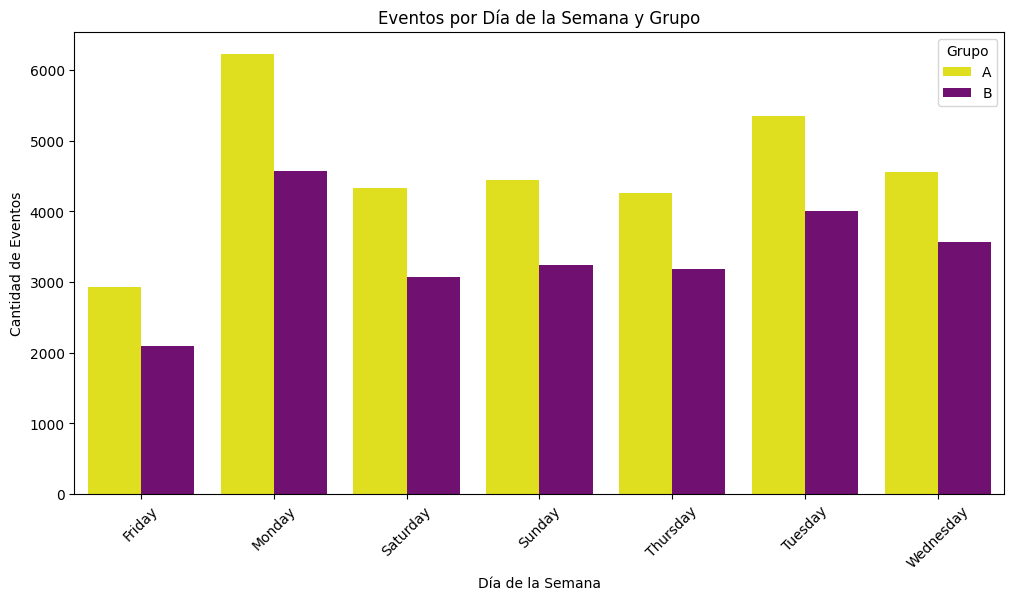

In [17]:
#Agrupamos los eventos de usuario por dia de la semana
events_participants['day_of_week'] = events_participants['event_dt'].dt.day_name()
events_by_day = events_participants.groupby(['day_of_week', 'group']).size().reset_index(name='event_count')
print('\nEventos por día de la semana y grupo:')
print(events_by_day)

#Creamos un gráfico de barras para visualizar los eventos por día de la semana
plt.figure(figsize=(12, 6))
sns.barplot(data=events_by_day, x='day_of_week', y='event_count', hue='group', palette={'A': 'yellow', 'B': 'purple'})
plt.title('Eventos por Día de la Semana y Grupo')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.show()

    - El análisis del volumen de eventos por día revela que los usuarios de ambos grupos son más activos entre lunes y miércoles, con un pico especialmente alto los lunes. Esto sugiere que el inicio de semana es clave en la interacción con la plataforma, posiblemente ligado a hábitos de navegación o compras post-fin de semana. Estos patrones deben ser considerados al lanzar futuras pruebas A/B o campañas de marketing, ya que el comportamiento del usuario varía claramente según el día y podría afectar los resultados si no se controla adecuadamente.

## Peculariadidades en los datos

    - Durante el análisis se detectó un desbalance en el tamaño de los grupos (grupo A con más usuarios que grupo B), así como participantes sin eventos registrados o fuera del rango de fechas definido por la prueba. Aunque estas situaciones no comprometen directamente la validez del experimento, es crucial controlarlas en futuras pruebas para asegurar una distribución equitativa y evitar ruido en los resultados.

# Resultados de la prueba A/B

      - Según los registros dejados por el equipo previo, se esperaba un aumento de al menos un 10 % en cada etapa del embudo para el grupo B. Sin embargo, los resultados actuales muestran que, si bien hubo mejoras en algunas etapas, estas no alcanzaron de forma consistente ese umbral ni presentaron diferencias estadísticamente significativas en todos los casos. Esto sugiere que las expectativas iniciales fueron optimistas y que el sistema de recomendaciones necesita ajustes adicionales antes de una implementación definitiva.

## Z Test

In [19]:
def prueba_z(etapa, verbose=True):
    # Éxitos por grupo
    éxitos = [
        final_funnel.loc['A', f'{etapa}_sum'],
        final_funnel.loc['B', f'{etapa}_sum']
    ]

    # Tamaño de muestra por grupo
    muestras = [
        final_funnel.loc['A', f'{etapa}_count'],
        final_funnel.loc['B', f'{etapa}_count']
    ]

    # Prueba Z unilateral (alternativa: prop_B > prop_A)
    stat, pval = proportions_ztest(count=éxitos, nobs=muestras, alternative='larger')

    if verbose:
        print(f'\n👉 Etapa: {etapa}')
        print(f'Grupo A: {éxitos[0]}/{muestras[0]} ({éxitos[0]/muestras[0]:.2%})')
        print(f'Grupo B: {éxitos[1]}/{muestras[1]} ({éxitos[1]/muestras[1]:.2%})')
        print(f'Estadístico Z: {stat:.4f}')
        print(f'Valor p: {pval:.4f}')
        if pval < 0.05:
            print("✅ Resultado: diferencia significativa a favor de B")
        else:
            print("❌ Resultado: no se rechaza H₀, diferencia no significativa")

# Ejecutar para cada etapa
for etapa in ['product_page', 'product_cart', 'purchase']:
    prueba_z(etapa)


👉 Etapa: product_page
Grupo A: 5080/6491 (78.26%)
Grupo B: 3841/5005 (76.74%)
Estadístico Z: 1.9368
Valor p: 0.0264
✅ Resultado: diferencia significativa a favor de B

👉 Etapa: product_cart
Grupo A: 2419/6491 (37.27%)
Grupo B: 1975/5005 (39.46%)
Estadístico Z: -2.3997
Valor p: 0.9918
❌ Resultado: no se rechaza H₀, diferencia no significativa

👉 Etapa: purchase
Grupo A: 2613/6491 (40.26%)
Grupo B: 1950/5005 (38.96%)
Estadístico Z: 1.4067
Valor p: 0.0798
❌ Resultado: no se rechaza H₀, diferencia no significativa


# Conclusiones

El análisis de la prueba A/B del sistema de recomendaciones muestra que, durante los 14 días posteriores al registro, el grupo B (nuevo sistema) presentó una tasa de conversión superior en algunas etapas del embudo de compra, aunque no todas las diferencias fueron estadísticamente significativas. Esto indica que el nuevo sistema tiene potencial, especialmente en la etapa inicial (product_page), donde los usuarios parecen más propensos a interactuar con productos recomendados. Sin embargo, esta ventaja inicial no se traduce de forma contundente en un aumento significativo de compras, por lo que el beneficio comercial total es, por ahora, moderado.

A futuro, se recomienda realizar una nueva iteración del experimento con mayor enfoque en optimizar la experiencia posterior al "add to cart", ya que parece ser el cuello de botella principal. Además, sería útil probar diferentes versiones del sistema de recomendaciones segmentadas por tipo de dispositivo o perfil de usuario. Finalmente, asegurar una asignación más balanceada de usuarios entre grupos y extender el periodo de observación podrían ayudar a obtener conclusiones más sólidas sobre la retención y el valor a largo plazo del nuevo sistema.